# Classification - tree

In [2]:
getwd()
heart <- read.csv("heart.csv")

[1] "D:/DataScience/first-repository"

In [3]:
str(heart)

'data.frame':	303 obs. of  15 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age      : int  63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : int  1 1 1 1 0 1 0 0 1 1 ...
 $ ChestPain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ RestBP   : int  145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : int  233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : int  1 0 0 0 0 0 0 0 0 1 ...
 $ RestECG  : int  2 2 2 0 2 0 2 0 2 2 ...
 $ MaxHR    : int  150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : int  0 1 1 0 0 0 0 1 0 1 ...
 $ Oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : int  3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : int  0 3 2 0 0 0 2 0 1 0 ...
 $ Thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2 2 2 2 3 3 ...
 $ AHD      : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...


In [6]:
names(heart) <- c("x", "age", "sex", "chestpain", "restbp", "chol", "fbs", "restecg", "maxhr", "exang", "oldpeak", "slope", "ca", "thal", "ahd")
str(heart)

'data.frame':	303 obs. of  15 variables:
 $ x        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age      : int  63 67 67 37 41 56 62 57 63 53 ...
 $ sex      : int  1 1 1 1 0 1 0 0 1 1 ...
 $ chestpain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ restbp   : int  145 160 120 130 130 120 140 120 130 140 ...
 $ chol     : int  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs      : int  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg  : int  2 2 2 0 2 0 2 0 2 2 ...
 $ maxhr    : int  150 108 129 187 172 178 160 163 147 155 ...
 $ exang    : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope    : int  3 2 2 3 1 1 3 1 2 3 ...
 $ ca       : int  0 3 2 0 0 0 2 0 1 0 ...
 $ thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2 2 2 2 3 3 ...
 $ ahd      : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...


In [7]:
table(heart$chestpain)


asymptomatic   nonanginal   nontypical      typical 
         144           86           50           23 

In [8]:
table(heart$thal)


     fixed     normal reversable 
        18        166        117 

In [9]:
table(heart$ahd)


 No Yes 
164 139 

In [10]:
heart$sex <- as.factor(heart$sex)
heart$fbs <- as.factor(heart$fbs)
heart$restecg <- as.factor(heart$restecg)
heart$exang <- as.factor(heart$exang)
heart$slop <- as.factor(heart$slop)
heart$ca <- as.factor(heart$ca)

str(heart)

'data.frame':	303 obs. of  16 variables:
 $ x        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age      : int  63 67 67 37 41 56 62 57 63 53 ...
 $ sex      : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 1 2 2 ...
 $ chestpain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ restbp   : int  145 160 120 130 130 120 140 120 130 140 ...
 $ chol     : int  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs      : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg  : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ maxhr    : int  150 108 129 187 172 178 160 163 147 155 ...
 $ exang    : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope    : int  3 2 2 3 1 1 3 1 2 3 ...
 $ ca       : Factor w/ 4 levels "0","1","2","3": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2 2 2 2 3 3 ...
 $ ahd      : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...
 $

In [22]:
library(caret)
set.seed(137)
idx <- createDataPartition(heart$ahd, p = 0.7)$Resample1
heart.train <- heart[idx, ]
heart.test <- heart[-idx, ]

In [14]:
install.packages("tree")

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JMLee\AppData\Local\Temp\RtmpOgXpAt\downloaded_packages


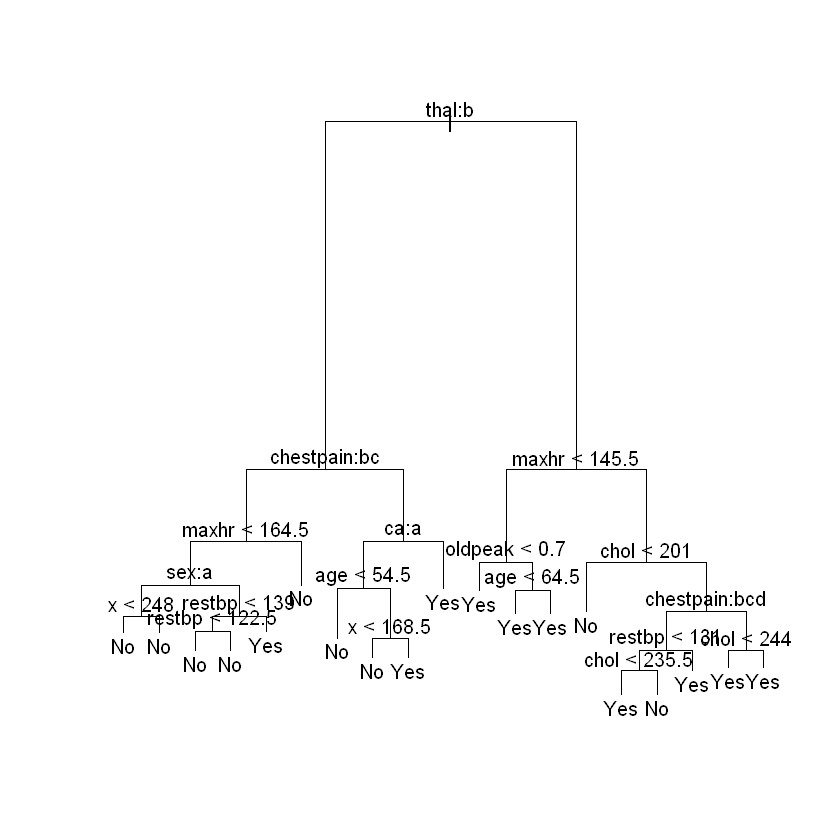

In [23]:
library(tree)
m_tree <- tree(ahd ~ ., data = heart.train)
plot(m_tree)
text(m_tree)

[1] 10

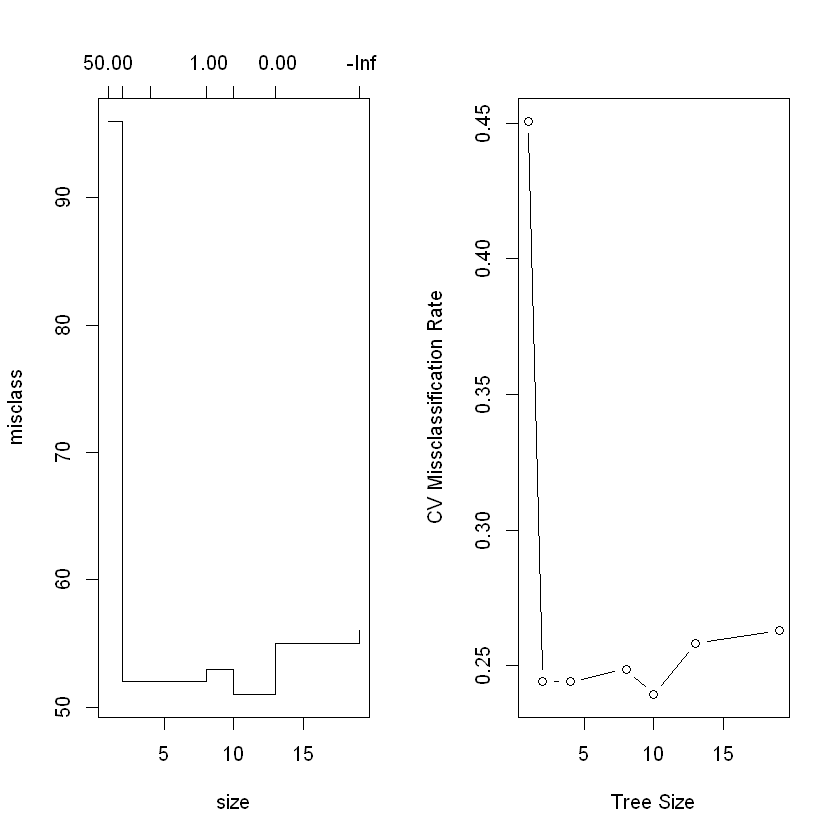

In [24]:
cv_tree <- cv.tree(m_tree, FUN = prune.misclass)
plot(cv_tree)
cv_tree$size[which.min(cv_tree$dev)]
par(mfrow = c(1, 2))
plot(cv_tree)
plot(cv_tree$size, cv_tree$dev / nrow(heart.train), type = "b", xlab = "Tree Size", ylab = "CV Missclassification Rate")

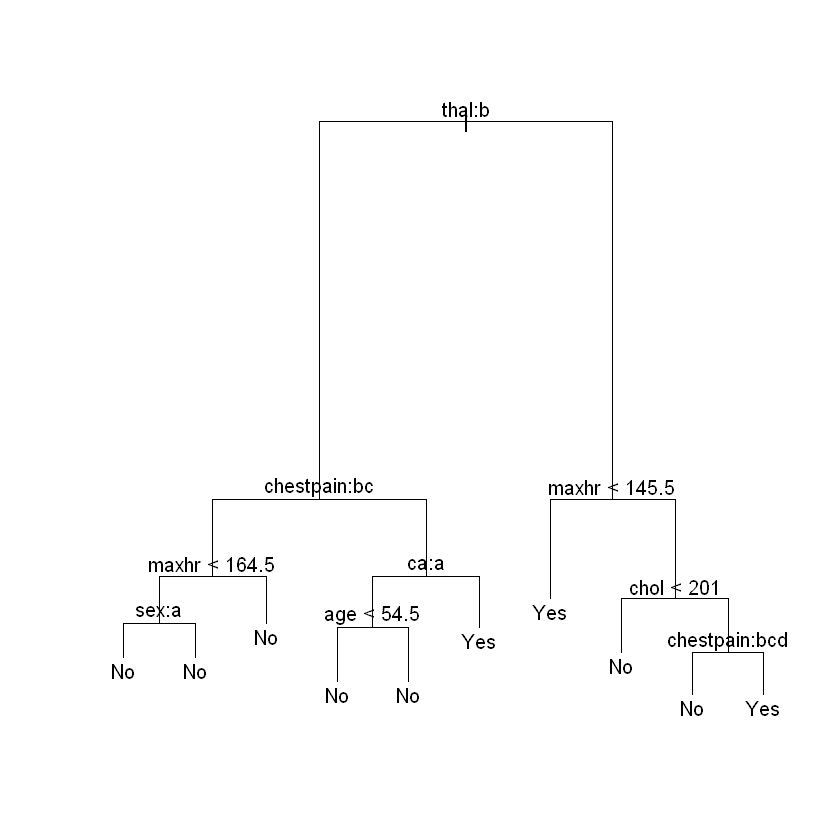

In [25]:
prune_tree <- prune.tree(m_tree, best = 10)
plot(prune_tree)
text(prune_tree)

In [26]:
pred_tree <- predict(prune_tree, heart.test, type='class')
out <- data.frame(ahd = heart.test$ahd, pred = pred_tree)

In [27]:
library(caret)
confusionMatrix(pred_tree, heart.test$ahd)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  40   6
       Yes  9  35
                                        
               Accuracy : 0.8333        
                 95% CI : (0.74, 0.9036)
    No Information Rate : 0.5444        
    P-Value [Acc > NIR] : 7.067e-09     
                                        
                  Kappa : 0.666         
                                        
 Mcnemar's Test P-Value : 0.6056        
                                        
            Sensitivity : 0.8163        
            Specificity : 0.8537        
         Pos Pred Value : 0.8696        
         Neg Pred Value : 0.7955        
             Prevalence : 0.5444        
         Detection Rate : 0.4444        
   Detection Prevalence : 0.5111        
      Balanced Accuracy : 0.8350        
                                        
       'Positive' Class : No            
                                        

# Classification - rpart

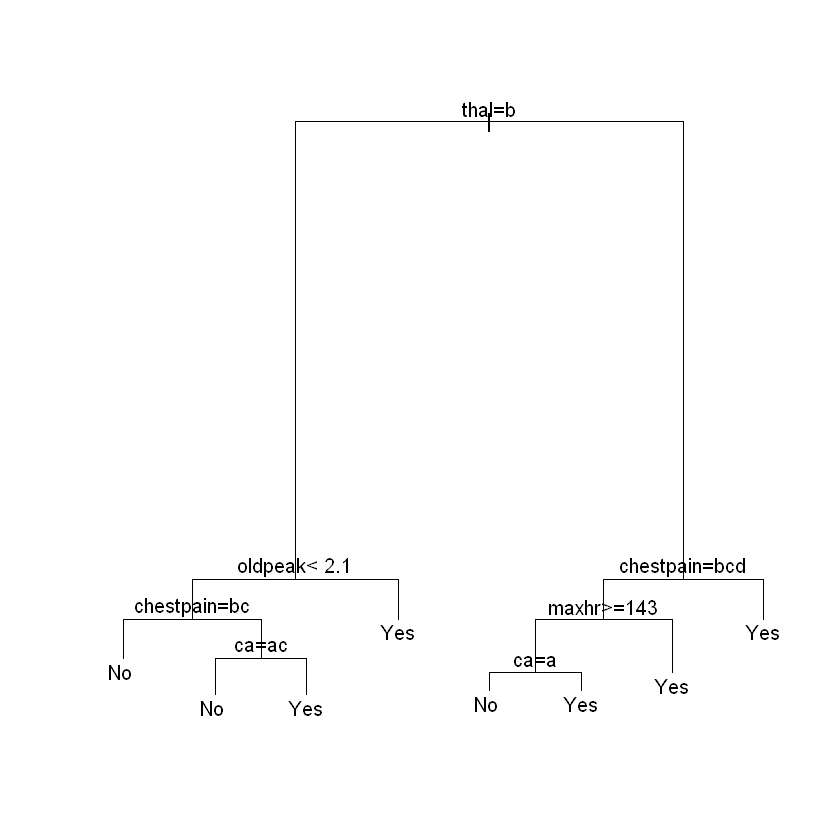

In [29]:
library(rpart)
m_rpart <- rpart(ahd ~ ., data = heart.train, method="class")
plot(m_rpart)
text(m_rpart)

In [30]:
printcp(m_rpart)


Classification tree:
rpart(formula = ahd ~ ., data = heart.train, method = "class")

Variables actually used in tree construction:
[1] ca        chestpain maxhr     oldpeak   thal     

Root node error: 98/213 = 0.46009

n= 213 

        CP nsplit rel error  xerror     xstd
1 0.520408      0   1.00000 1.00000 0.074224
2 0.040816      1   0.47959 0.47959 0.061757
3 0.030612      2   0.43878 0.52041 0.063552
4 0.020408      4   0.37755 0.56122 0.065177
5 0.010000      7   0.31633 0.54082 0.064385


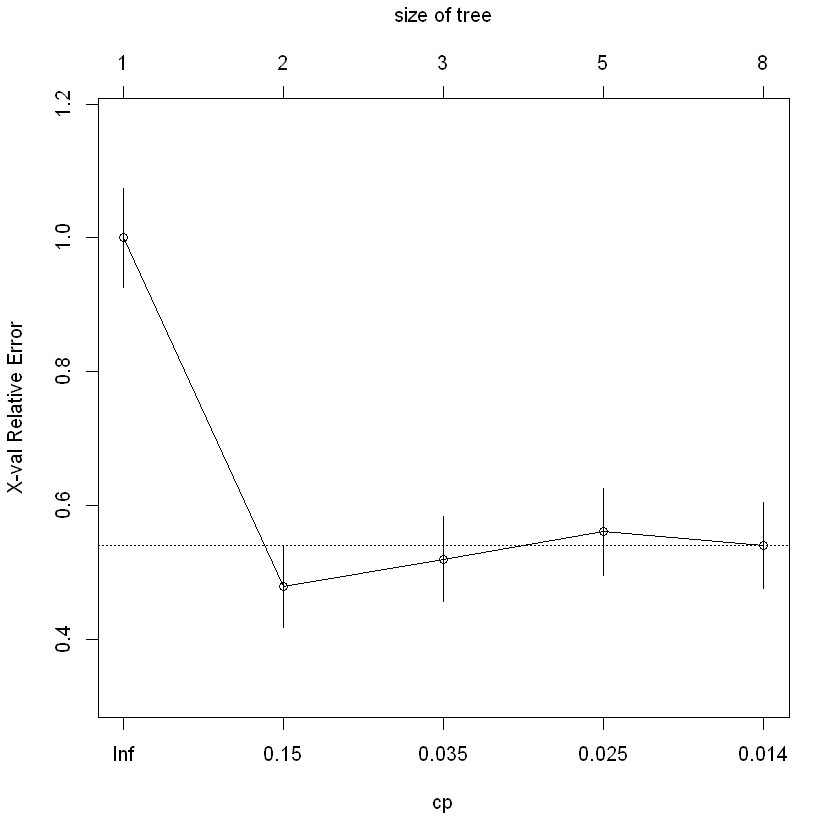

In [33]:
plotcp(m_rpart)

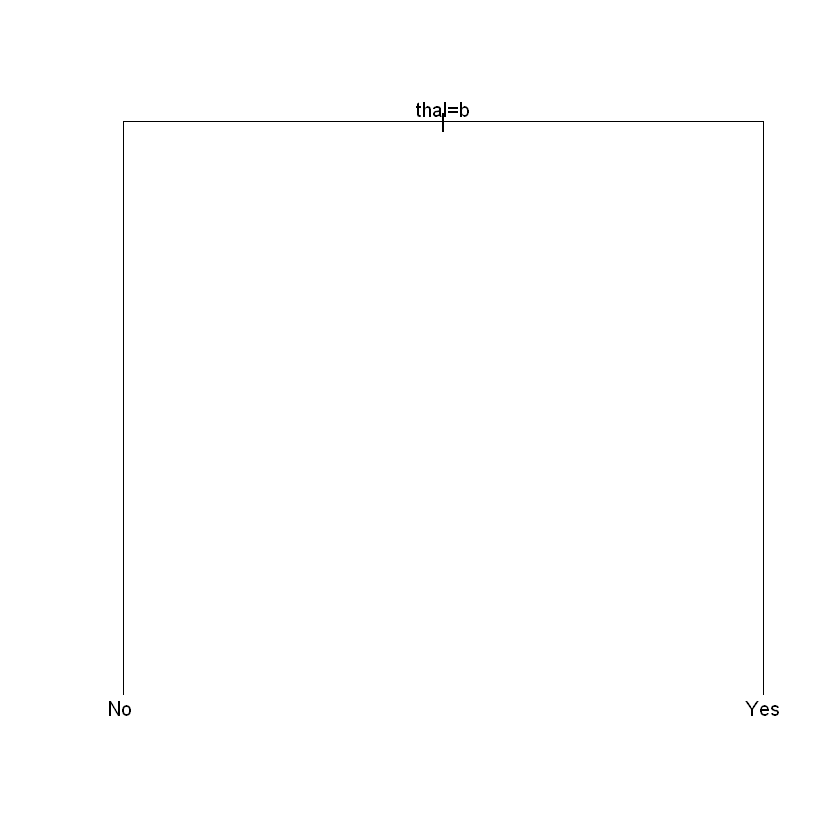

In [41]:
prune_rpart <- prune(m_rpart, cp = m_rpart$cptable[which.min(m_rpart$cptable[, "xerror"]), "CP"])
plot(prune_rpart)
text(prune_rpart)

In [42]:
pred_rpart <- predict(prune_rpart, heart.test, type='class')
out_rpart <- heart.test
out_rpart$pred <- pred_rpart

In [43]:
confusionMatrix(pred_rpart, heart.test$ahd)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  37  12
       Yes 12  29
                                          
               Accuracy : 0.7333          
                 95% CI : (0.6297, 0.8211)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 0.0001788       
                                          
                  Kappa : 0.4624          
                                          
 Mcnemar's Test P-Value : 1.0000000       
                                          
            Sensitivity : 0.7551          
            Specificity : 0.7073          
         Pos Pred Value : 0.7551          
         Neg Pred Value : 0.7073          
             Prevalence : 0.5444          
         Detection Rate : 0.4111          
   Detection Prevalence : 0.5444          
      Balanced Accuracy : 0.7312          
                                          
       'Positive' Class : No              
                                 

In [53]:
a <- confusionMatrix(pred_rpart, heart.test$ahd)
precision <- c(a$byClass['Pos Pred Value'])
recall <- c(a$byClass['Sensitivity'])
F1 <- 2*(precision*recall)/(precision+recall)

Warning message:
"package 'ROCR' was built under R version 3.6.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



,No,Yes
4,0.7881356,0.2118644
8,0.7881356,0.2118644
17,0.2315789,0.7684211
19,0.7881356,0.2118644
20,0.7881356,0.2118644
23,0.7881356,0.2118644
26,0.7881356,0.2118644
29,0.7881356,0.2118644
31,0.7881356,0.2118644
36,0.7881356,0.2118644


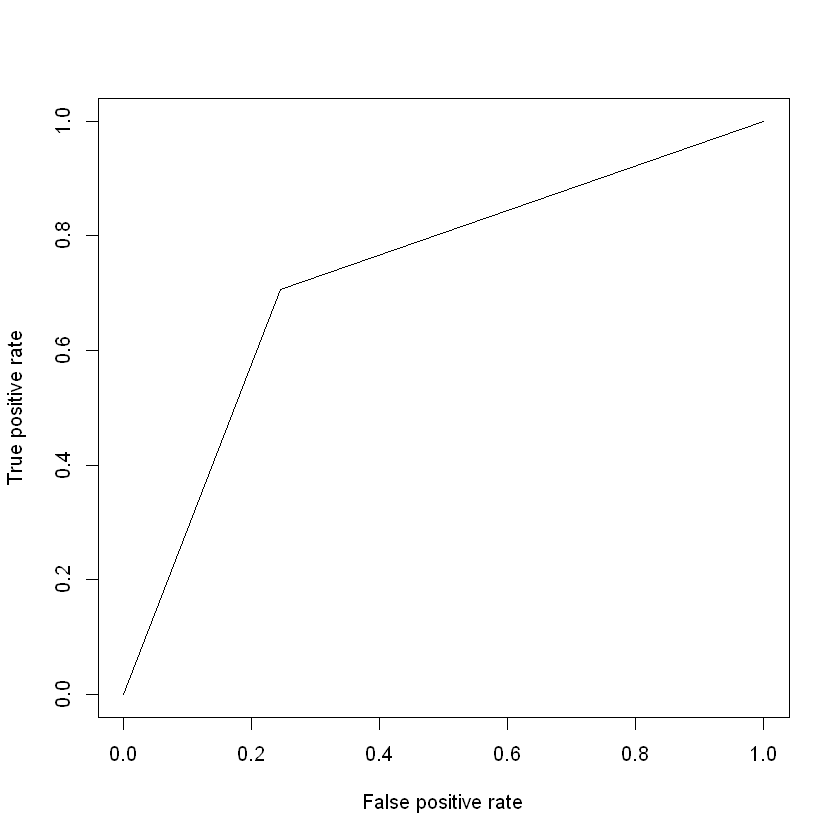

In [54]:
library(ROCR)
pred_rpart_prob <- predict(prune_rpart, heart.test, type='prob')
out_rpart_prob <- heart.test
out_rpart_prob$prob <- pred_rpart_prob
out_rpart_prob$prob
d_r <- prediction(out_rpart_prob$prob[,2], out_rpart_prob$ahd)
plot(performance(d_r, "tpr", "fpr"))

In [55]:
performance(d_r, "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7312096


Slot "alpha.values":
list()
